In [1]:
#all Imports

# import libraries
from numpy import mean
from numpy import std
from numpy import hstack
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns



In [3]:
# reading csv files
df =  pd.read_csv('adult.data', sep=",", header=None, skipinitialspace=True)
df2 = pd.read_csv('adult.test', sep=",", header=None, skipinitialspace=True)

# Join the data and test files together
df = pd.concat([df, df2])

# Shuffle the rows
df = df.sample(frac=1).reset_index(drop=True)

# Replace all of ? with None
df = df.replace(['?'], [None])

# Drop all rows with None in them
df = df.dropna(axis=0)

# Check no None values remain
df.isnull().sum()

#Adding column headers to our data 
df.columns = ["Age", "Workclass", "Fnlwgt", "Education", "Education-num", "Marital-status", "Occupation", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss", "Hours-per-week", "Native-country", "Income"]

In [4]:
#Description
df.describe()

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
#Datatypes
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education-num      int64
Marital-status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital-gain       int64
Capital-loss       int64
Hours-per-week     int64
Native-country    object
Income            object
dtype: object

In [6]:
#Visualise missing entries by feature
#msno.matrix(df)

<AxesSubplot:ylabel='Frequency'>

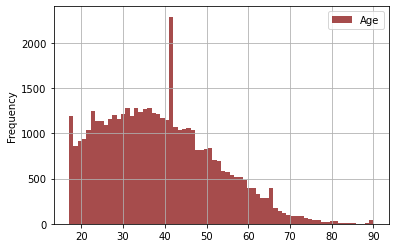

In [7]:
#Plot histograms for relevant numerical features

age = df[["Age"]]

age.plot(kind='hist', bins = 70, alpha = 0.7, grid = True, color = '#800000')


<AxesSubplot:ylabel='Frequency'>

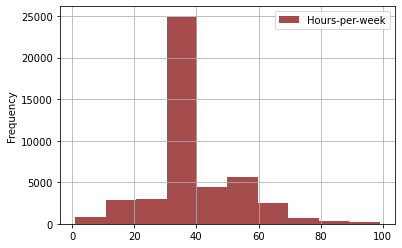

In [8]:
hpw = df[["Hours-per-week"]]

hpw.plot(kind="hist", alpha = 0.7, grid = True, color = '#800000')

In [9]:
#Encoding income variable

income_mapping_dict = {
    "<=50K" : "<=50000",
    ">50K" : ">50000", 
    "<=50K." : "<=50000", 
    ">50K." : ">50000"
    }

df["Income"] = df["Income"].map(income_mapping_dict)

<AxesSubplot:xlabel='count', ylabel='Education'>

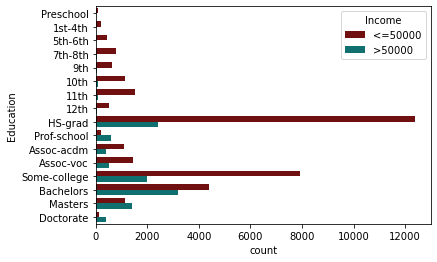

In [10]:
#Categorical features compared with Income
ed = df[['Education']]

#unique = np.unique(ed)

correctOrder = ['Preschool', '1st-4th', '5th-6th', '7th-8th', 
'9th', '10th', '11th', '12th', 'HS-grad', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Some-college', 'Bachelors', 'Masters', 'Doctorate']

defaultPalette = sns.color_palette(["#800000", '#008080'])

sns.countplot(y = 'Education', data = df, order = correctOrder, hue = 'Income', palette= defaultPalette)




<AxesSubplot:xlabel='count', ylabel='Race'>

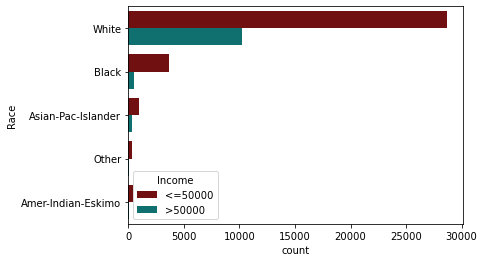

In [11]:
race = df[['Race']]

sns.countplot(y = 'Race', data = df, hue= 'Income', palette= defaultPalette)

<AxesSubplot:xlabel='count', ylabel='Sex'>

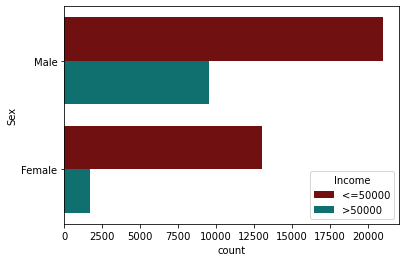

In [12]:
sns.countplot(y = 'Sex', data = df, hue = 'Income', palette= defaultPalette)

<AxesSubplot:xlabel='Age', ylabel='Count'>

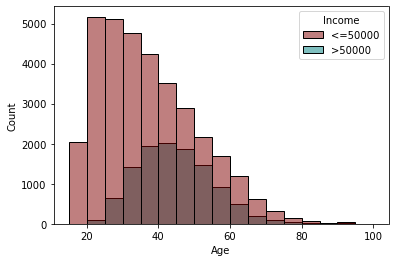

In [27]:
#Histograms for numerical high correlation features

sns.histplot(x = 'Age', data = df, binwidth = 5, hue = 'Income', binrange = (15,100), palette = defaultPalette)

<AxesSubplot:xlabel='Hours-per-week', ylabel='Count'>

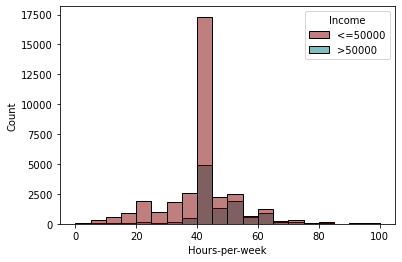

In [30]:
sns.histplot(x = 'Hours-per-week', data = df, binwidth = 5, hue = 'Income', palette = defaultPalette, binrange = (0,100))

<AxesSubplot:xlabel='count', ylabel='Marital-status'>

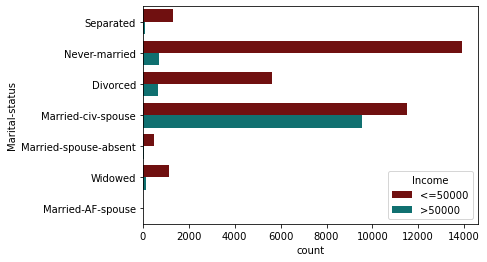

In [31]:
sns.countplot(y = 'Marital-status', data = df, hue = 'Income', palette = defaultPalette)

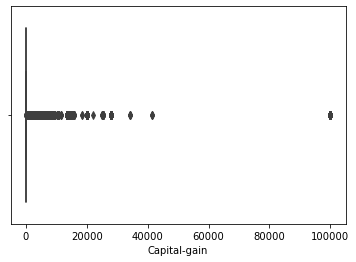

In [13]:
#box and whiskers for capital gain/capital loss
g = sns.boxplot(x = 'Capital-gain', data = df)


#too many zero's, therefor box and whisker doesn't work


<AxesSubplot:ylabel='Capital-gain'>

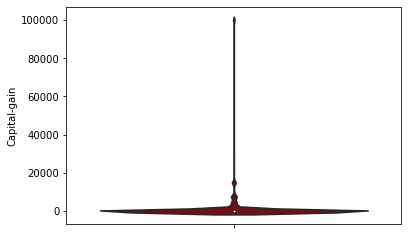

In [14]:
# violin plot

sns.violinplot(y = 'Capital-gain', data = df, color = '#800000')

<AxesSubplot:ylabel='Capital-loss'>

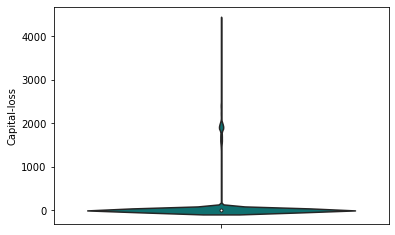

In [15]:
sns.violinplot(y = 'Capital-loss', data = df, color = '#008080')

In [5]:


sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(r, annot=True)

NameError: name 'r' is not defined